In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_effective_return(cagr, starting_corpus = 500000, years = 10, management_rate = 1, hurdle = 5, profit_sharing_rate = 15):
    corpus = starting_corpus
    
    for year in range(1,years+1):
        management_fee = (management_rate/100)*corpus
        corpus_after_mf = corpus - management_fee
        profit = (cagr/100)*corpus_after_mf
        corpus_before_ps = corpus_after_mf + profit

        if cagr>hurdle:
            profit_shared = corpus_after_mf*(cagr - hurdle)*profit_sharing_rate/10000
        else:
            profit_shared = 0

        final_corpus =  corpus_before_ps - profit_shared
        corpus = final_corpus

    effective_cagr = ((final_corpus/starting_corpus)**(1/years) - 1)*100
    return effective_cagr


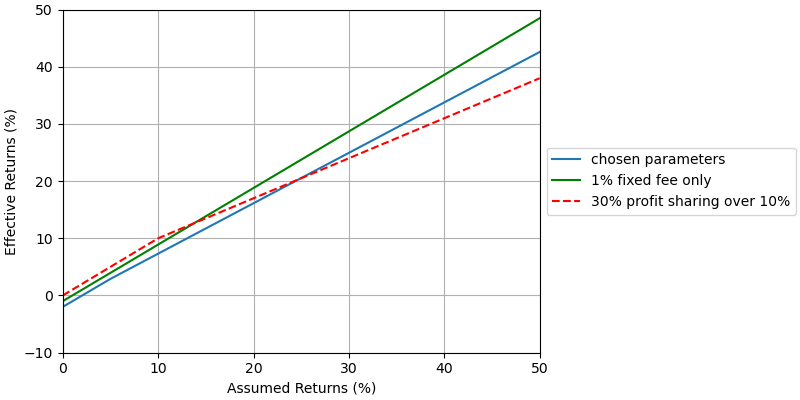

In [3]:
vfunc = np.vectorize(get_effective_return)
cagrs = np.linspace(0,50,100)
def get_effcagrs(years = 10,MF_rate = 2,hurdle = 5,PS_rate = 10):
    eff_cagrs = vfunc(cagrs,500000,years,MF_rate,hurdle,PS_rate)
    return (eff_cagrs)

output = widgets.Output() 
with output:
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 4))
     
# move the toolbar to the bottom
fig.canvas.toolbar_position = 'bottom'
ax.grid(True) 
ax.set_xlabel('Assumed Returns (%)')
ax.set_ylabel('Effective Returns (%)')
ax.set_xlim([0,50])
ax.set_ylim([-10,50])
line, = ax.plot(cagrs, get_effcagrs(), label = 'chosen parameters')
line1, = ax.plot(cagrs, get_effcagrs(1,1,0,0),color='green', label = '1% fixed fee only')
line1, = ax.plot(cagrs, get_effcagrs(1,0,10,30),color='red',linestyle='dashed', label = '30% profit sharing over 10%')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#cagr = 10
years = 1
MF_rate = 1
hurdle = 5
PS_rate = 10

# create some control elements
#years_slider = widgets.IntSlider(value=10, min=1, max=100, step=1, description='Duration in years',continuous_update=True)
#CAGR_slider = widgets.IntSlider(value=10, min=0, max=100, step=1, description='Return(CAGR) assumed')
MFrate_slider = widgets.FloatSlider(value=1, min=0, max=5, step=0.1, description='Fixed fee %',continuous_update=True)
hurdle_slider = widgets.FloatSlider(value=5, min=0, max=20, step=0.1, description='Hurdle rate %',continuous_update=True)
PSrate_slider = widgets.IntSlider(value=10, min=0, max=80, step=1, description='Profit Sharing %',continuous_update=True)
 
# callback functions     
def update_MFrate(change):
    global MF_rate
    MF_rate = change.new
    line.set_ydata(get_effcagrs(years = years,MF_rate = MF_rate,hurdle = hurdle,PS_rate = PS_rate))
    fig.canvas.draw()
    
def update_hurdle(change):
    global hurdle
    hurdle = change.new
    line.set_ydata(get_effcagrs(years = years,MF_rate = MF_rate,hurdle = hurdle,PS_rate = PS_rate))
    fig.canvas.draw()

def update_PSrate(change):
    global PS_rate
    PS_rate = change.new
    line.set_ydata(get_effcagrs(years = years,MF_rate = MF_rate,hurdle = hurdle,PS_rate = PS_rate))
    fig.canvas.draw()
 
#connecting callbacks and traits
#years_slider.observe(update_years, 'value')
#CAGR_slider.observe(update_CAGR, 'value')
MFrate_slider.observe(update_MFrate, 'value')
hurdle_slider.observe(update_hurdle, 'value')
PSrate_slider.observe(update_PSrate, 'value')
 
controls = widgets.VBox([ MFrate_slider, hurdle_slider, PSrate_slider])
widgets.HBox([controls, output])